In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
    
data = pd.read_csv('pokemon_go.csv')
x = data['cp'].values
y = data['cp_new'].values

In [38]:
b_range = np.linspace(-500, 300, 100)
w_range = np.linspace(0, 5, 100)
B, W = np.meshgrid(b_range, w_range)
Loss = np.zeros_like(B)

In [39]:
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        y_pred = B[i, j] + W[i, j] * x
        Loss[i, j] = np.mean((y - y_pred) ** 2)

Text(0.5, 1.0, 'Linear Regression Loss Surface')

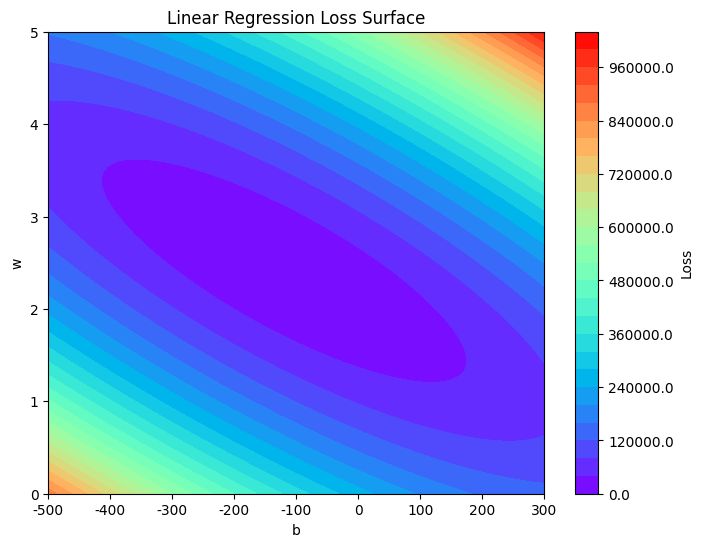

In [40]:
plt.figure(figsize=(8,6))
cp = plt.contourf(B, W, Loss, 30, cmap='rainbow')
plt.colorbar(cp, label='Loss', format='%.1f')
plt.xlabel('b')
plt.ylabel('w')
plt.title('Linear Regression Loss Surface')

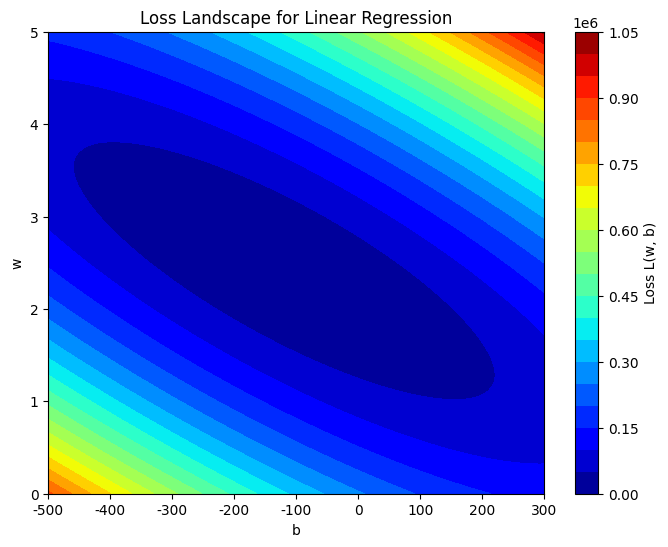

In [41]:
plt.figure(figsize=(8,6))
cp = plt.contourf(B, W, Loss, 20, cmap='jet')
plt.colorbar(cp, label='Loss L(w, b)')
plt.xlabel('b')
plt.ylabel('w')
plt.title('Loss Landscape for Linear Regression')
plt.show()

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


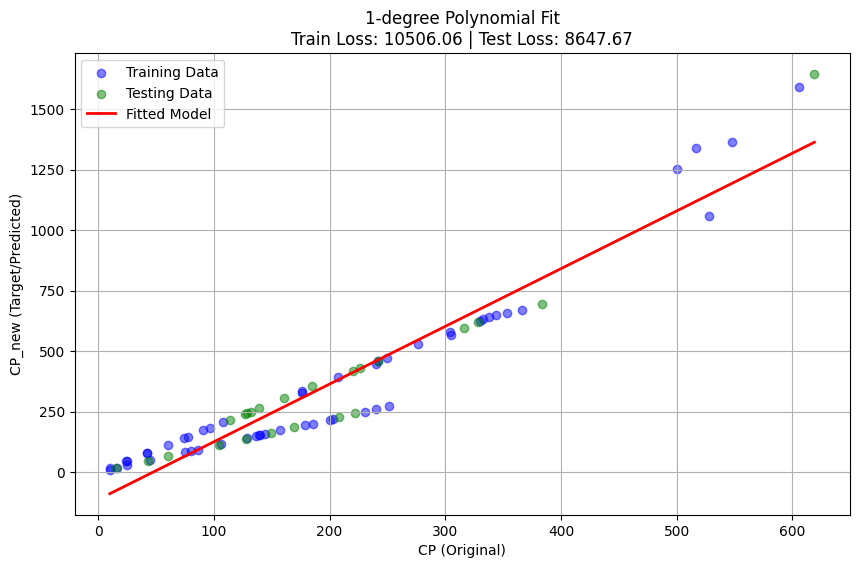

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


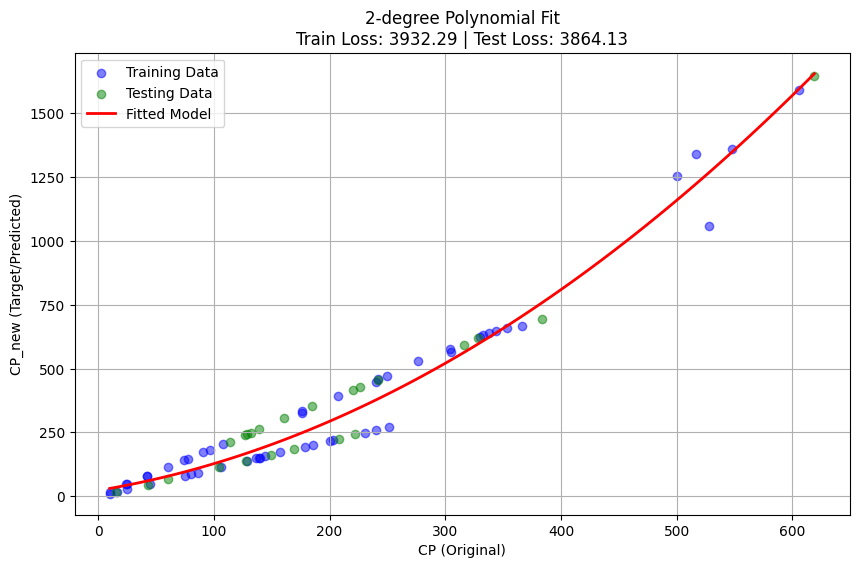

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


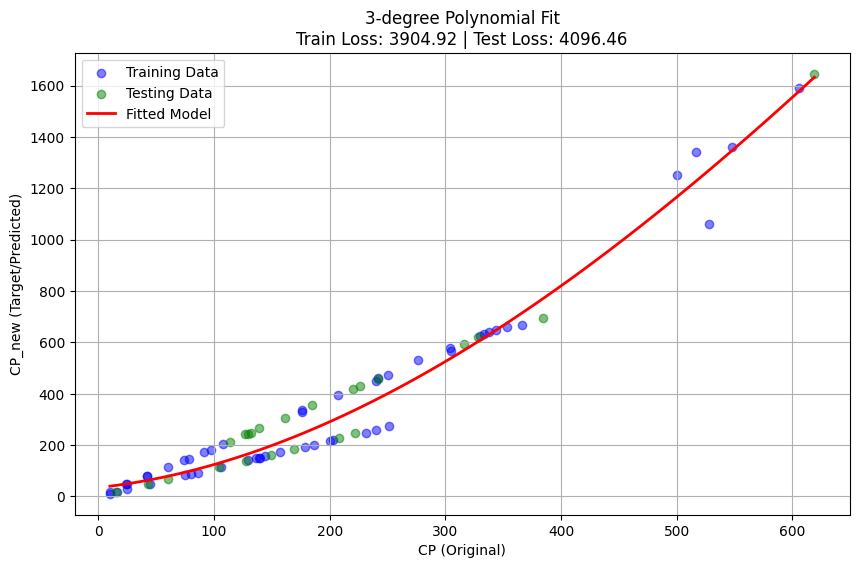

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


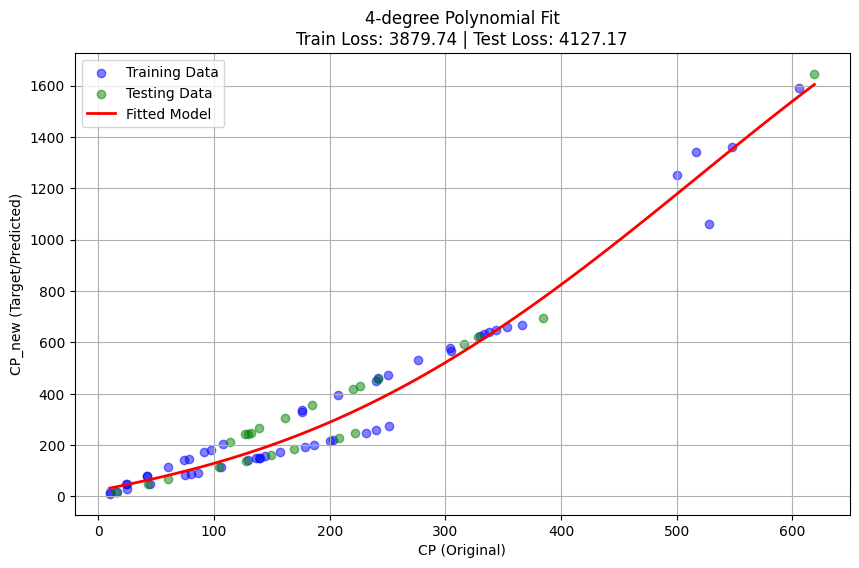

/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


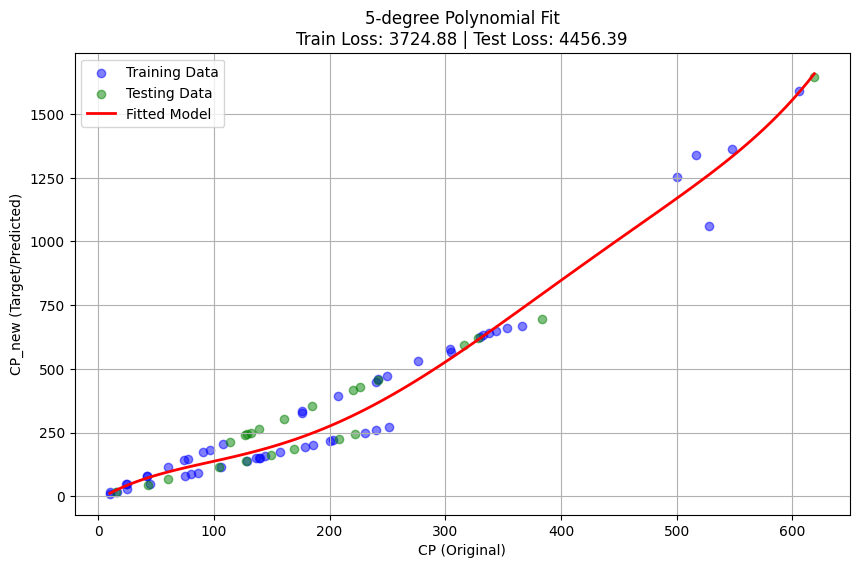

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# --- 1. 加载数据 ---
# 假设 'pokemon_go.csv' 文件在当前目录下
data = pd.read_csv('pokemon_go.csv')
x_data = data[['cp']]      # 使用 [['cp']] 保持为 DataFrame 格式
y_data = data[['cp_new']]

# --- 2. 切分训练集和测试集 ---
# random_state 保证每次切分结果都一样，便于复现
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# --- 3. 循环创建不同次数的多项式回归模型 ---
degrees = [1, 2, 3, 4, 5]  # 定义要尝试的多项式次数

for degree in degrees:
    # --- 3a. 创建多项式特征 ---
    # include_bias=False 表示不包含偏置项（截距），因为线性回归模型会自动处理
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # 转换训练数据和测试数据
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.transform(x_test)

    # --- 3b. 训练模型 ---
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # --- 3c. 在训练集和测试集上进行预测 ---
    y_train_pred = model.predict(x_train_poly)
    y_test_pred = model.predict(x_test_poly)

    # --- 3d. 计算 Loss (均方误差) ---
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)

    # --- 3e. 可视化拟合效果 ---
    plt.figure(figsize=(10, 6))
    
    # 绘制原始数据点
    plt.scatter(x_train, y_train, alpha=0.5, label='Training Data', color='blue')
    plt.scatter(x_test, y_test, alpha=0.5, label='Testing Data', color='green')

    # 绘制拟合曲线
    # 为了使曲线平滑，我们创建一个连续的 x 序列来预测
    x_range = np.linspace(x_data.min(), x_data.max(), 100).reshape(-1, 1)
    x_range_poly = poly_features.transform(x_range)
    y_range_pred = model.predict(x_range_poly)
    
    plt.plot(x_range, y_range_pred, color='red', linewidth=2, label='Fitted Model')

    # 添加图表信息
    plt.title(f'{degree}-degree Polynomial Fit\nTrain Loss: {train_loss:.2f} | Test Loss: {test_loss:.2f}')
    plt.xlabel('CP (Original)')
    plt.ylabel('CP_new (Target/Predicted)')
    plt.legend()
    plt.grid(True)
    plt.show()


--- Step 1: Loading Data & Initial Visualization ---
Data loaded successfully from 'pokemon_go.csv'. Shape: (75, 27)


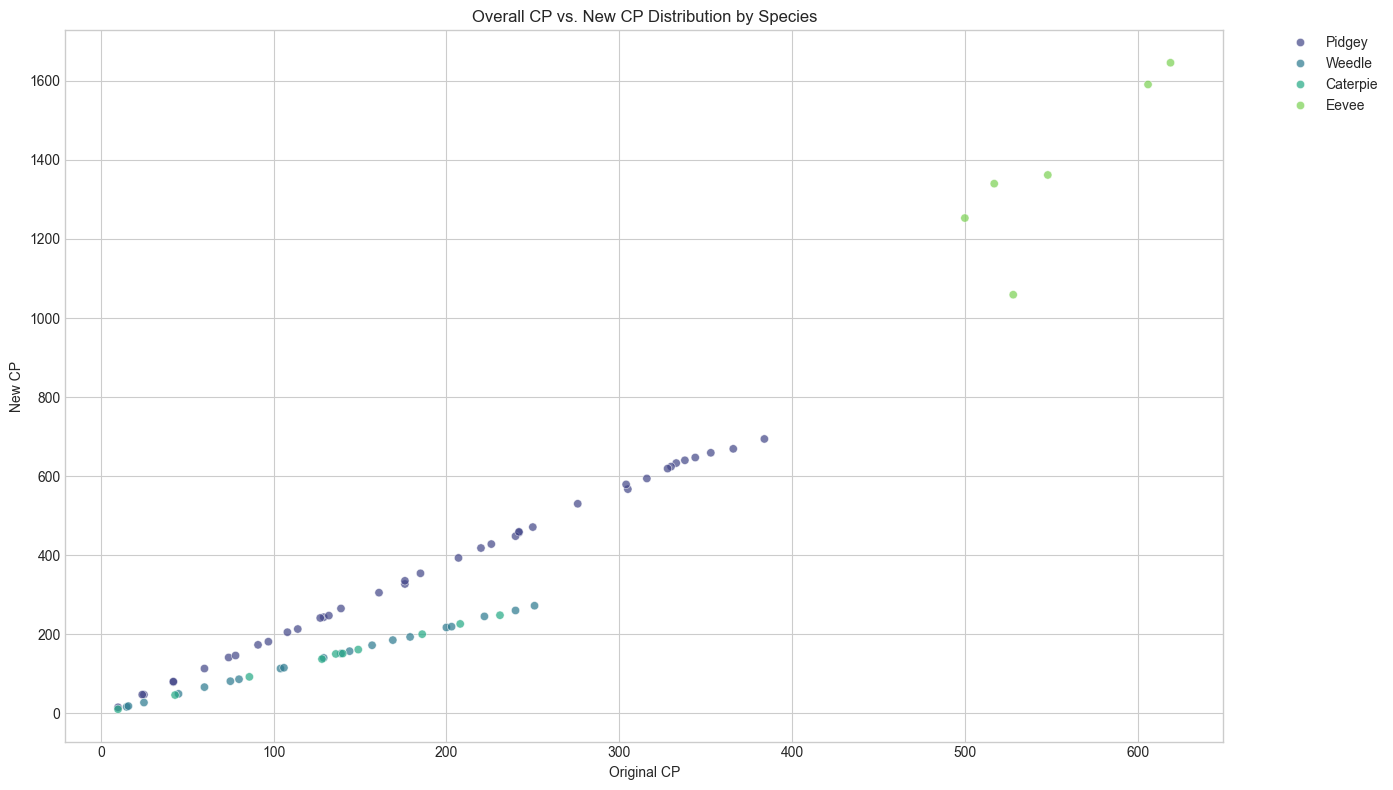

Found 4 unique species.
------------------------------------------------------------

--- Processing Species: [Pidgey] ---
Data split: 27 training records, 12 testing records.
Training and evaluating models of varying complexity...
  - Degree 1: Train Loss = 50.83, Test Loss = 23.43
  - Degree 2: Train Loss = 36.65, Test Loss = 23.00
  - Degree 3: Train Loss = 21.13, Test Loss = 25.73
  - Degree 4: Train Loss = 15.19, Test Loss = 9.02
  - Degree 5: Train Loss = 13.74, Test Loss = 10.09


/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

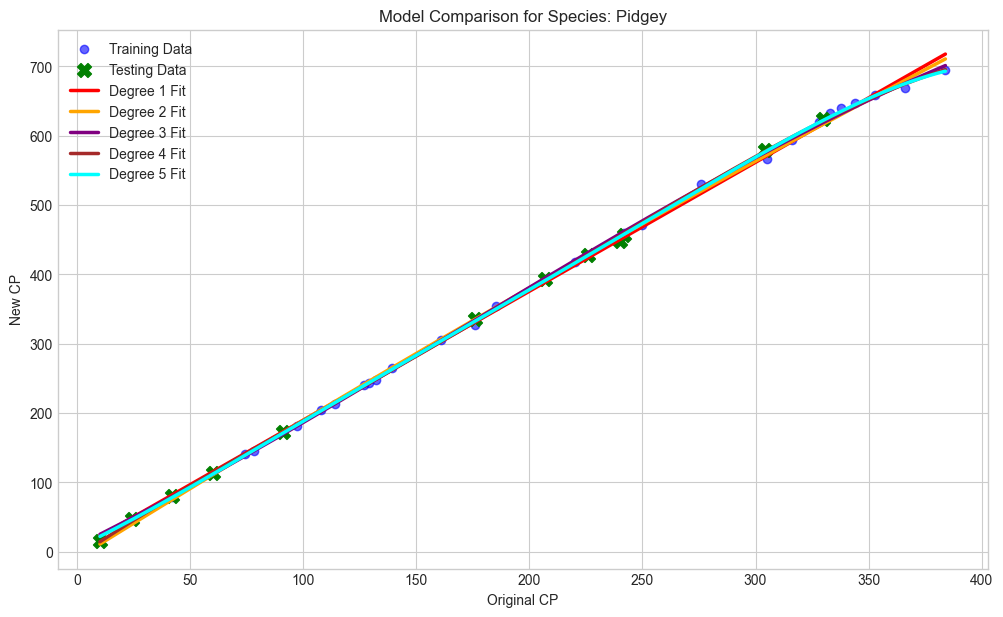

------------------------------------------------------------

--- Processing Species: [Weedle] ---
Data split: 14 training records, 6 testing records.
Training and evaluating models of varying complexity...
  - Degree 1: Train Loss = 1.67, Test Loss = 0.63
  - Degree 2: Train Loss = 1.66, Test Loss = 0.67
  - Degree 3: Train Loss = 1.62, Test Loss = 0.58
  - Degree 4: Train Loss = 1.61, Test Loss = 0.61
  - Degree 5: Train Loss = 1.49, Test Loss = 1.61


/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

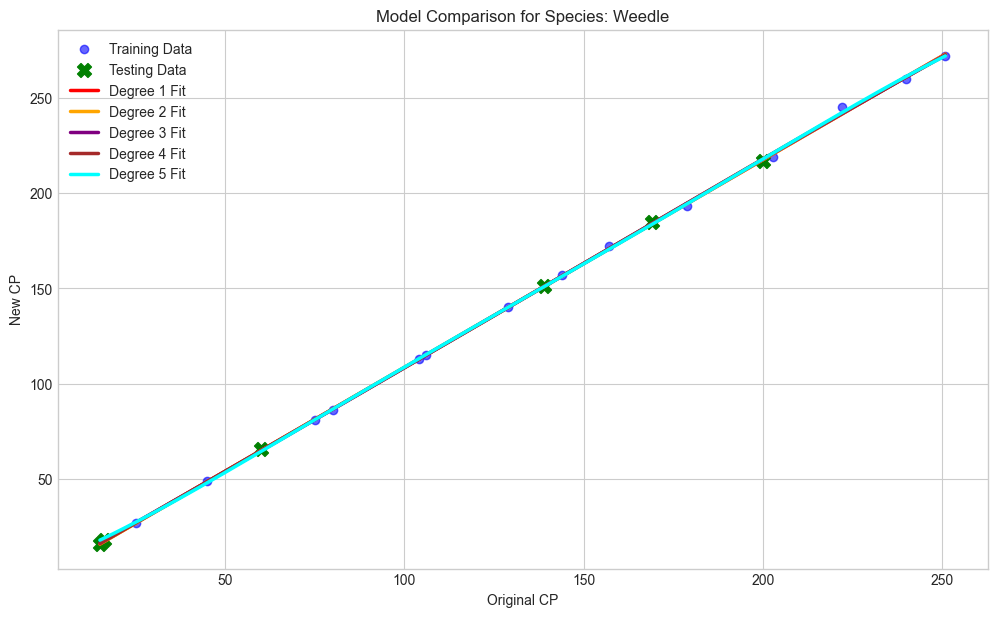

------------------------------------------------------------

--- Processing Species: [Caterpie] ---
Data split: 7 training records, 3 testing records.
Training and evaluating models of varying complexity...
  - Degree 1: Train Loss = 1.67, Test Loss = 2.83
  - Degree 2: Train Loss = 1.63, Test Loss = 2.25
  - Degree 3: Train Loss = 1.62, Test Loss = 3.25
  - Degree 4: Train Loss = 0.80, Test Loss = 167.88
  - Degree 5: Train Loss = 0.51, Test Loss = 6,058.93


/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

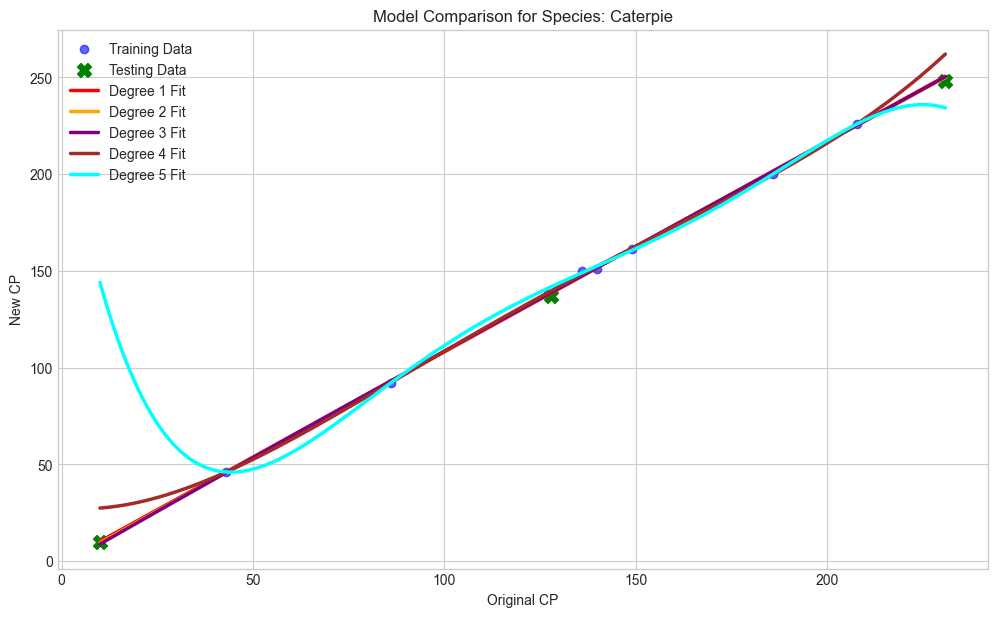

------------------------------------------------------------

--- Processing Species: [Eevee] ---
Data split: 5 training records, 1 testing records.
Training and evaluating models of varying complexity...
  - Degree 1: Train Loss = 13,033.69, Test Loss = 2,118.08
  - Degree 2: Train Loss = 10,179.58, Test Loss = 4,779.17
  - Degree 3: Train Loss = 9,165.87, Test Loss = 19,716.66
  - Degree 4: Train Loss = 0.00, Test Loss = 47,439,909.24
  - Degree 5: Train Loss = 1.21, Test Loss = 61,685,333.94


/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/lissu/.local/share/mamba/envs/dl/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserW

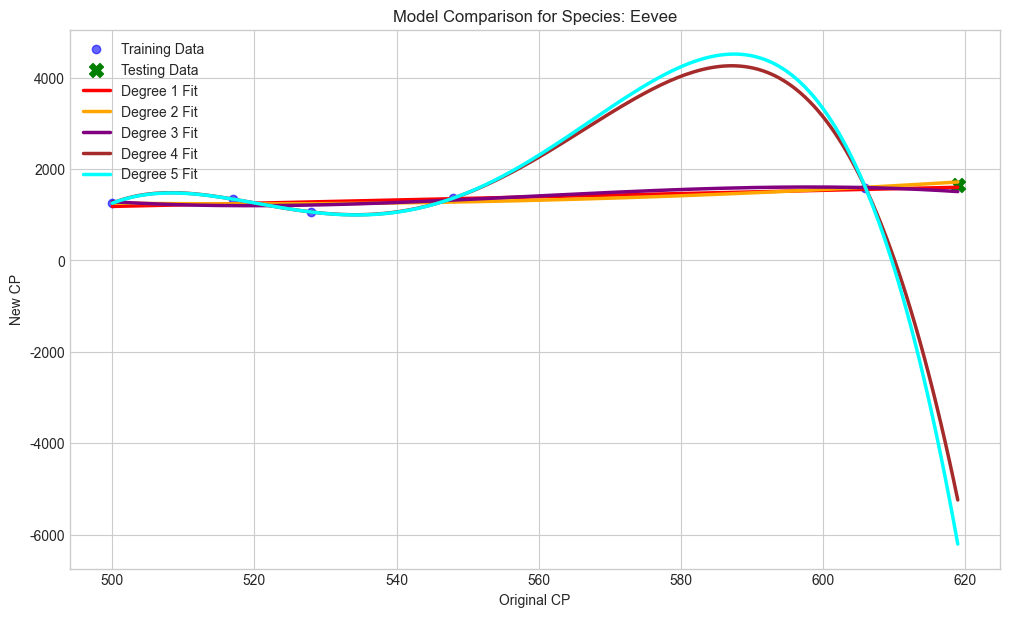

------------------------------------------------------------

All species have been processed.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns

# ===================================================================
# 0. SETUP & INITIALIZATION
# ===================================================================
# Suppress warnings for cleaner output, e.g., from fitting small datasets.
# Use a visually appealing style for plots.
plt.style.use('seaborn-v0_8-whitegrid')


# ===================================================================
# 1. EXPLORATORY DATA ANALYSIS (EDA)
# ===================================================================
print("--- Step 1: Loading Data & Initial Visualization ---")
# Assume 'pokemon_go.csv' is in the accessible path.
file_path = 'pokemon_go.csv'
try:
    data = pd.read_csv(file_path)
    print(f"Data loaded successfully from '{file_path}'. Shape: {data.shape}")

    # Create a scatter plot to visualize the cp vs. cp_new relationship for all species.
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=data, x='cp', y='cp_new', hue='species', alpha=0.7, palette='viridis')
    plt.title('Overall CP vs. New CP Distribution by Species')
    plt.xlabel('Original CP')
    plt.ylabel('New CP')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()

    species_list = data['species'].unique()
    print(f"Found {len(species_list)} unique species.")
    
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    # Exit if the data can't be loaded.
    exit()

print("-" * 60)


# ===================================================================
# 2. PER-SPECIES MODELING PIPELINE
# ===================================================================
# Iterate through each unique species to build a custom model.
for species in species_list:
    print(f"\n--- Processing Species: [{species}] ---")

    # --- 2a. Data Filtering and Preparation ---
    species_data = data[data['species'] == species].copy()

    # Skip species with insufficient data for meaningful training and testing.
    if len(species_data) < 5:
        print(f"Skipping [{species}] due to insufficient data ({len(species_data)} records).")
        print("-" * 60)
        continue

    x_species = species_data[['cp']]
    y_species = species_data[['cp_new']]

    # --- 2b. Data Splitting ---
    # Adjust test_size for very small datasets to ensure the model can train.
    test_size = 0.3 if len(species_data) >= 10 else 1 / len(species_data)
    x_train, x_test, y_train, y_test = train_test_split(
        x_species, y_species, test_size=test_size, random_state=42
    )
    print(f"Data split: {len(x_train)} training records, {len(x_test)} testing records.")

    # --- 2c. Model Training, Evaluation, and Visualization ---
    plt.figure(figsize=(12, 7))
    
    # Plot the raw data points.
    plt.scatter(x_train, y_train, color='blue', alpha=0.6, label='Training Data')
    plt.scatter(x_test, y_test, color='green', marker='X', s=100, label='Testing Data')
    
    degrees = [1, 2, 3, 4, 5]
    colors = ['red', 'orange', 'purple', 'brown', 'cyan']
    
    print("Training and evaluating models of varying complexity...")
    for i, degree in enumerate(degrees):
        # Create polynomial features for the current degree.
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        x_train_poly = poly_features.fit_transform(x_train)

        # Train the linear regression model on the polynomial features.
        model = LinearRegression()
        model.fit(x_train_poly, y_train)

        # Transform test data and calculate loss on both sets.
        x_test_poly = poly_features.transform(x_test)
        train_loss = mean_squared_error(y_train, model.predict(x_train_poly))
        test_loss = mean_squared_error(y_test, model.predict(x_test_poly))
        
        print(f"  - Degree {degree}: Train Loss = {train_loss:,.2f}, Test Loss = {test_loss:,.2f}")

        # For a smooth curve, generate predictions over a continuous range.
        x_range = np.linspace(x_species['cp'].min(), x_species['cp'].max(), 200).reshape(-1, 1)
        x_range_poly = poly_features.transform(x_range)
        y_range_pred = model.predict(x_range_poly)
        
        # Plot the fitted model curve.
        plt.plot(x_range, y_range_pred, color=colors[i], linewidth=2.5, label=f'Degree {degree} Fit')

    # --- 2d. Finalize and Display the Plot ---
    plt.title(f'Model Comparison for Species: {species}')
    plt.xlabel('Original CP')
    plt.ylabel('New CP')
    plt.legend()
    plt.show()
    
    print("-" * 60)

print("\nAll species have been processed.")